##### Кумулятивная доходность

Кумулятивная дневная прибыль полезна для определения стоимости инвестиций через определенные промежуток времени.

In [8]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [9]:
sber = yf.download('SBER.ME','2022-01-01')

[*********************100%***********************]  1 of 1 completed


In [10]:
# Скорректированая цена закрытия`
daily_close = sber[['Adj Close']]

# Дневная доходность
daily_pct_change = daily_close.pct_change()

# Заменить NA значения на 0
daily_pct_change.fillna(0, inplace=True)

In [11]:
# Кумулютивная дневная доходность
cum_daily_return = (1 + daily_pct_change).cumprod()

print(cum_daily_return.tail())

            Adj Close
Date                 
2022-05-18   0.413142
2022-05-19   0.414727
2022-05-20   0.414727
2022-05-23   0.414727
2022-05-24   0.414727


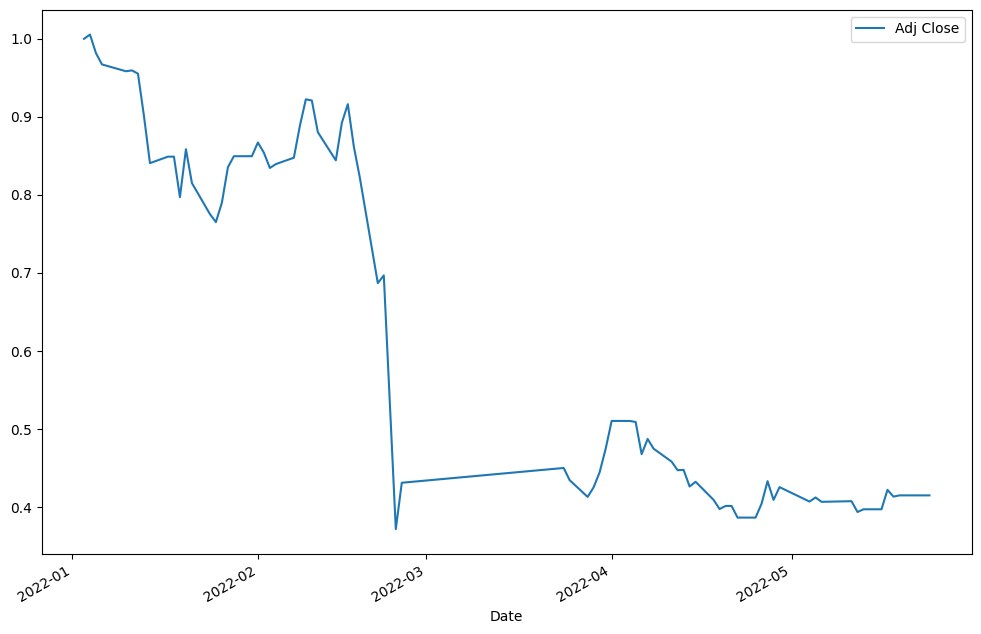

In [12]:
# Построение кумулятивной дневной доходности
cum_daily_return.plot(figsize=(12,8))

plt.show()

In [13]:
# Месячная кумулятивная доходность
cum_monthly_return = cum_daily_return.resample("M").mean()

print(cum_monthly_return.tail())

            Adj Close
Date                 
2022-01-31   0.880137
2022-02-28   0.798745
2022-03-31   0.440152
2022-04-30   0.439103
2022-05-31   0.408748


Знание того, как рассчитать доходность, является ценным при анализе акции. Но еще большую ценность оно представляет при сравнении с другими акциями.

Возьмем некоторые акции (выбор их совершенно случайный) и построим их диаграмму.

[*********************100%***********************]  7 of 7 completed


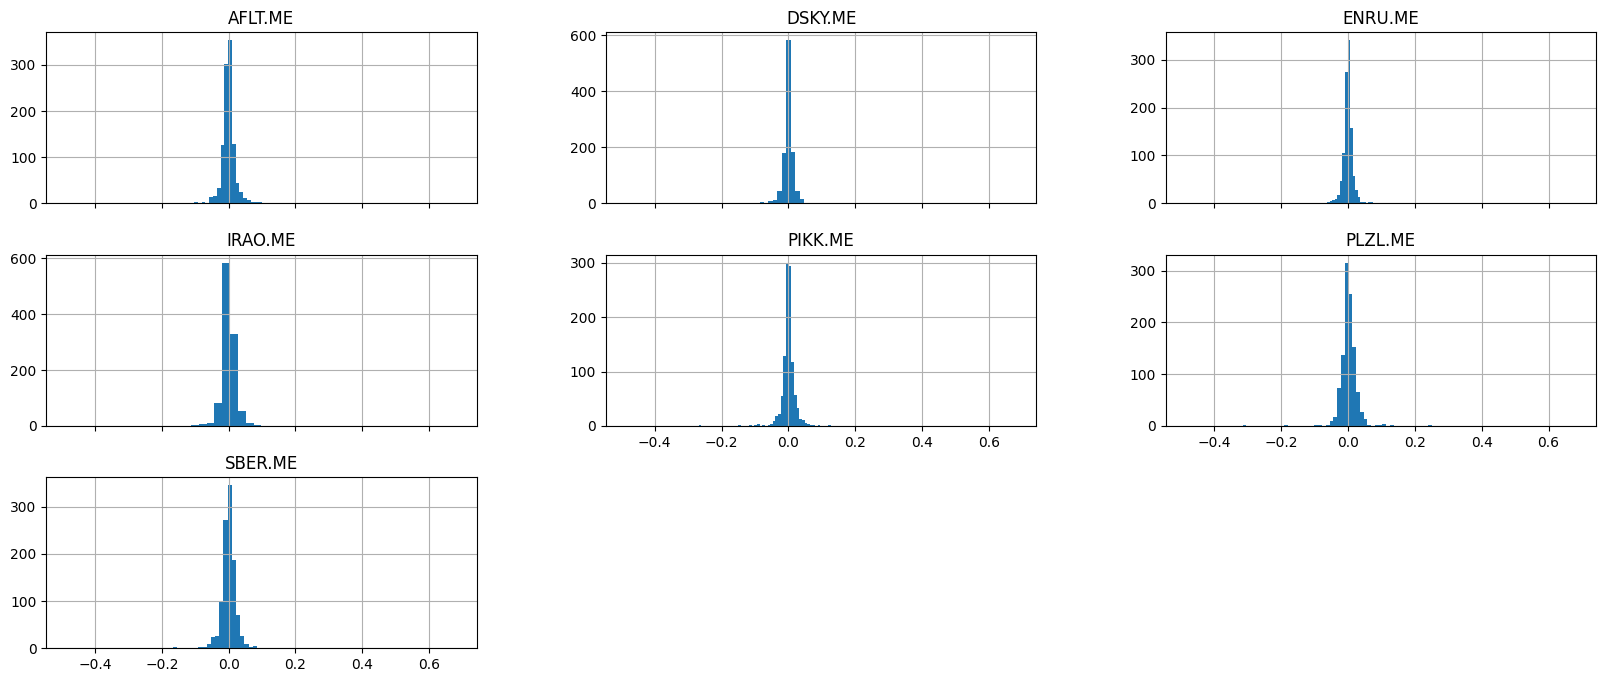

In [14]:
ticker = ['AFLT.ME','DSKY.ME','IRAO.ME','PIKK.ME', 'PLZL.ME','SBER.ME','ENRU.ME']

stock = yf.download(ticker,'2018-01-01')

# Дневная доходность в `daily_close_px`
daily_pct_change = stock['Adj Close'].pct_change()

# Распределение
daily_pct_change.hist(bins=50, sharex=True, figsize=(20,8))

plt.show()

Еще один полезный график —матрица рассеяния.

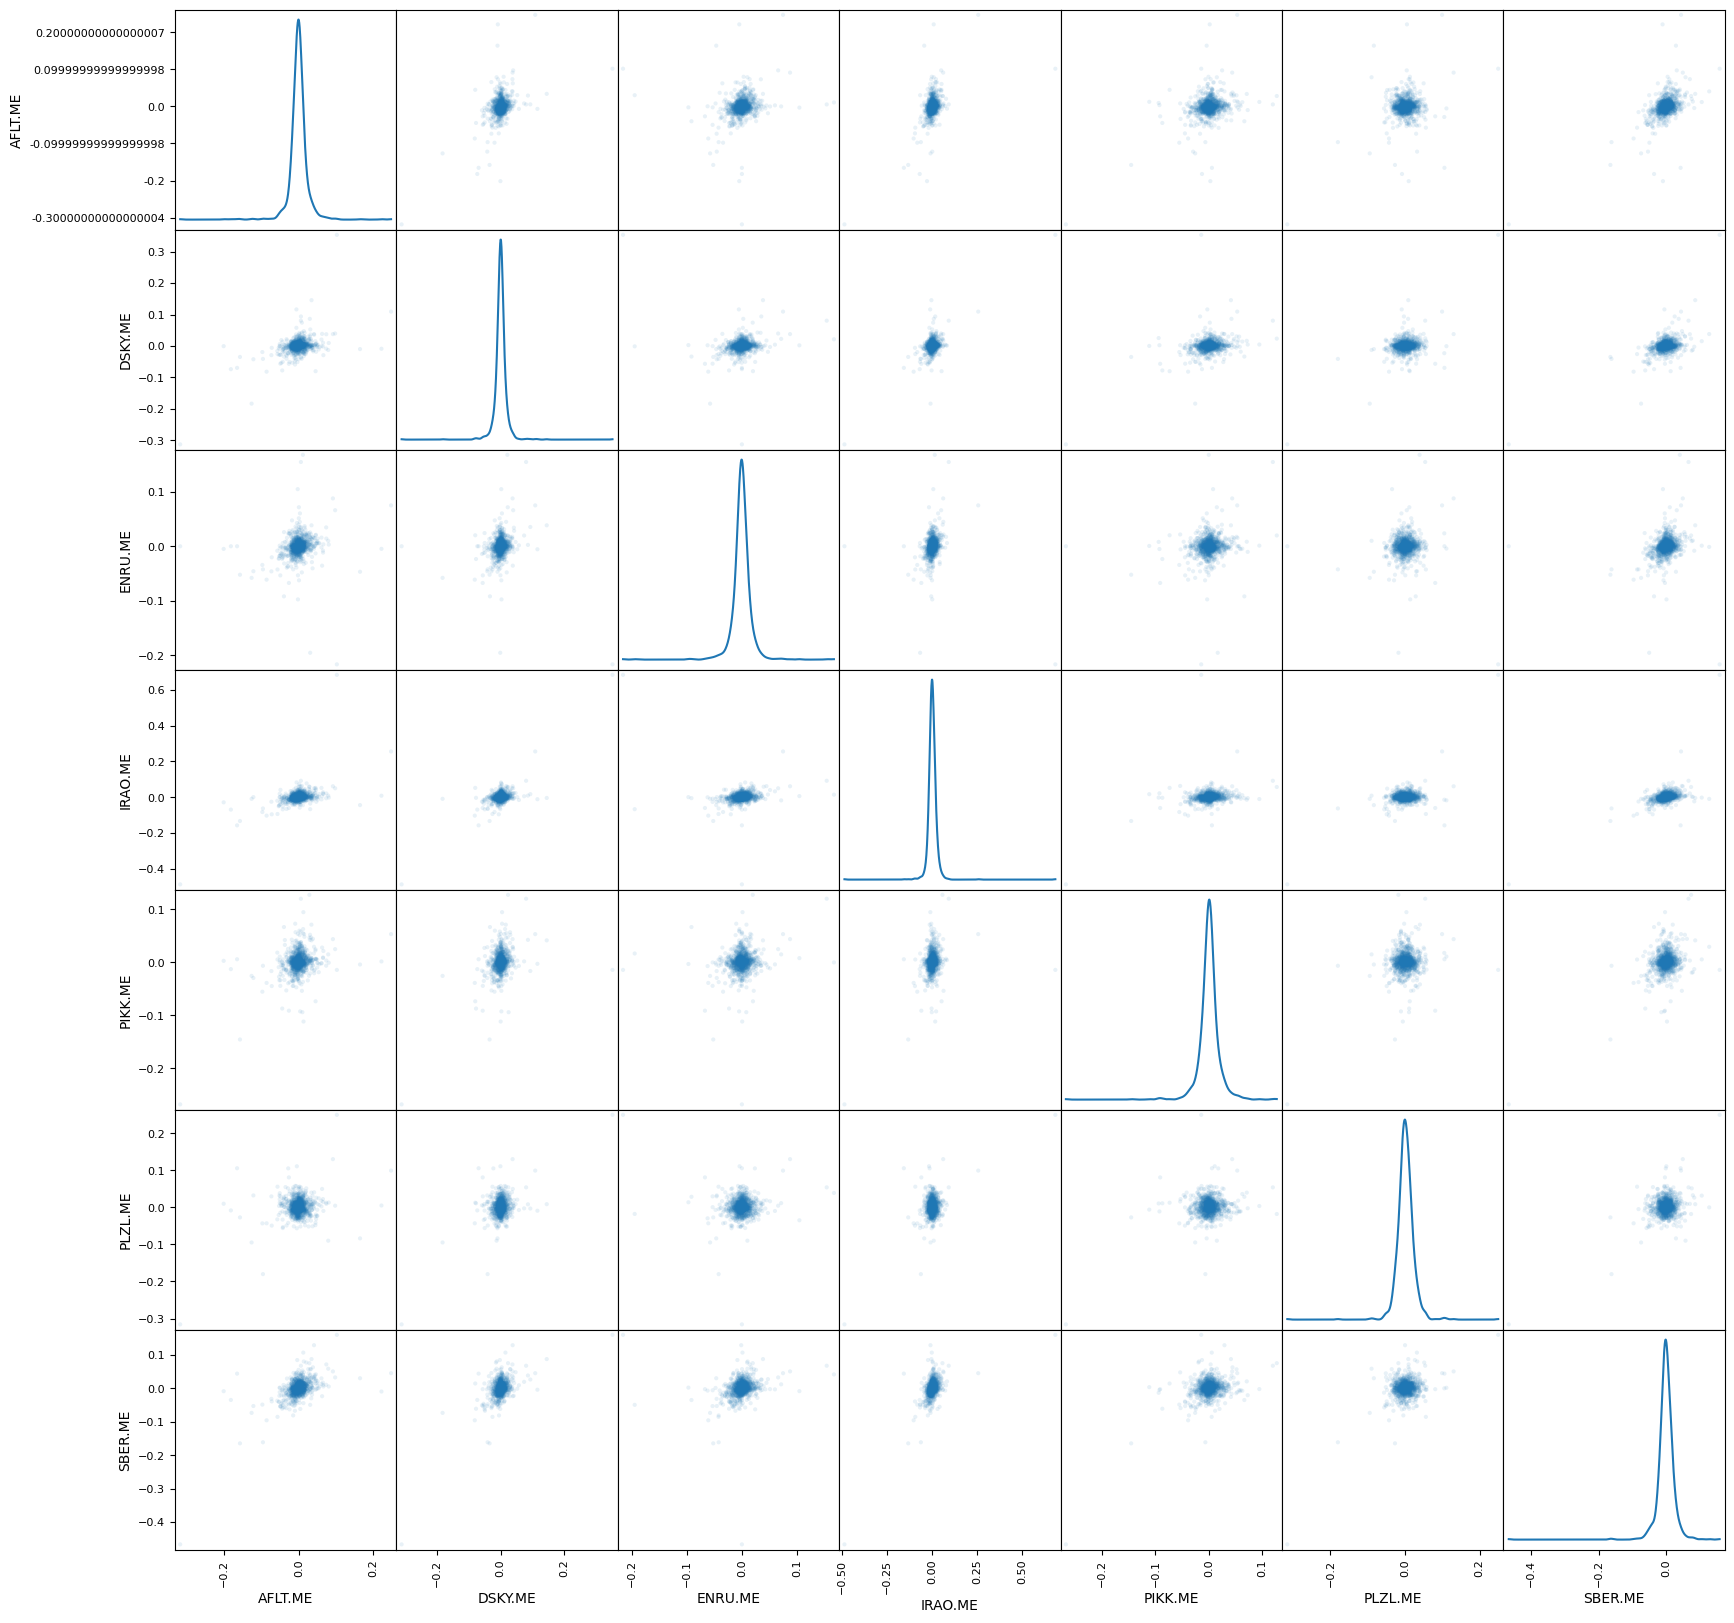

In [15]:
from pandas.plotting import scatter_matrix

# Матрица рассеивания `daily_pct_change`  
scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(20,20))

plt.show()